In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

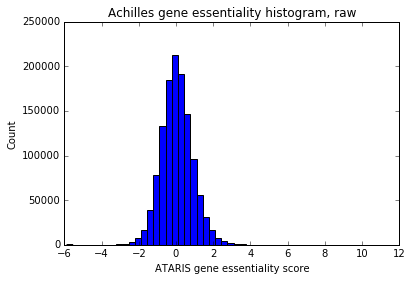

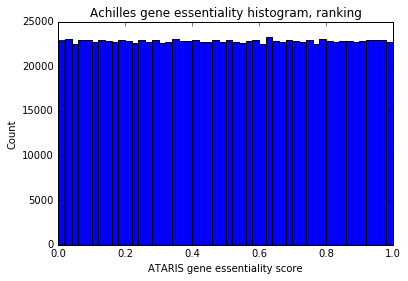

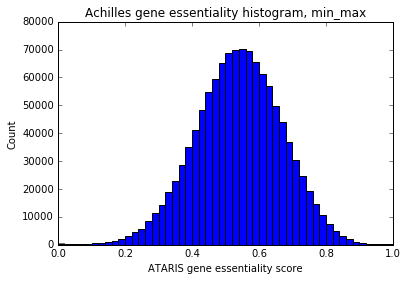

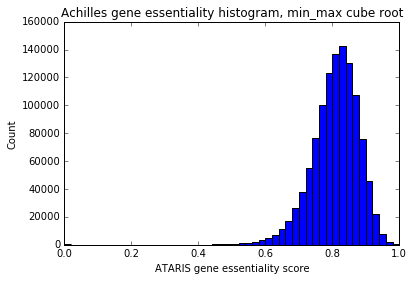

In [14]:
plt.figure(1)
all_values = df.values.flatten()
ax = plt.hist(all_values, bins=50)
plt.title("Achilles gene essentiality histogram, raw")
plt.xlabel("ATARIS gene essentiality score")
plt.ylabel("Count")

plt.figure(2)
df1 = pd.read_csv("../raw_data/Achilles_QC_v2.4.3.rnai.Gs.percent.txt", delimiter="\t")
df1.drop("Description", axis=1, inplace=True)
df1.dropna(inplace=True)
all_values = df1.values.flatten()
ax = plt.hist(all_values, bins=50)
plt.title("Achilles gene essentiality histogram, ranking")
plt.xlabel("ATARIS gene essentiality score")
plt.ylabel("Count")

plt.figure(3)
df1 = pd.read_csv("../raw_data/Achilles_QC_v2.4.3.rnai.Gs.minmax.txt", delimiter="\t")
df1.drop("Description", axis=1, inplace=True)
df1.dropna(inplace=True)
all_values = df1.values.flatten()
ax = plt.hist(all_values, bins=50)
plt.title("Achilles gene essentiality histogram, min_max")
plt.xlabel("ATARIS gene essentiality score")
plt.ylabel("Count")

plt.figure(4)
def cube_root(n):
    return n ** (1.0/3)
df1 = df1.applymap(cube_root)
all_values = df1.values.flatten()
ax = plt.hist(all_values, bins=50)
plt.title("Achilles gene essentiality histogram, min_max cube root")
plt.xlabel("ATARIS gene essentiality score")
plt.ylabel("Count")

In [31]:
print np.percentile(all_values, 99.9)
print np.percentile(all_values, 0.1)
print np.max(all_values)
print np.min(all_values)

3.21345520497
-2.83725945274
10.7434306769
-5.8760845772


In [25]:
toy_df = df[["Description", "IGROV1_OVARY", "COLO741_SKIN", "TC71_BONE", "HPAFII_PANCREAS", "NCIH1792_LUNG"]]
toy_df = toy_df[toy_df.Description.isin(["EGFR", "MDM2", "XIAP", "HSP90B1"])]
toy_df.drop("Description", axis=1, inplace=True)

In [38]:
print toy_df

                IGROV1_OVARY  COLO741_SKIN  TC71_BONE  HPAFII_PANCREAS  \
Name                                                                     
EGFR_1_00011       -0.439768     -0.568740  -0.521517         1.061267   
HSP90B1_1_0111      0.907320      0.280850  -1.082615         0.613687   
MDM2_1_1111        -0.467626      0.172475  -1.170011         1.986512   
XIAP_1_00101        0.029746     -1.123995  -0.073243         0.464377   

                NCIH1792_LUNG  
Name                           
EGFR_1_00011        -0.255228  
HSP90B1_1_0111      -0.029134  
MDM2_1_1111          0.431833  
XIAP_1_00101        -0.075738  


In [46]:
def min_max_scaler(n):
    if n < -2.83725945274:
        return 1
    elif n > 3.21345520497:
        return 0
    else:
        return (-n + 3.21345520497)/(3.21345520497+2.83725945274)

In [47]:
toy_df.applymap(min_max_scaler)

,IGROV1_OVARY,COLO741_SKIN,TC71_BONE,HPAFII_PANCREAS,NCIH1792_LUNG
Name,,,,,
EGFR_1_00011,0.603767,0.625082,0.617278,0.355692,0.573268
HSP90B1_1_0111,0.381134,0.484671,0.710010,0.429663,0.535902
MDM2_1_1111,0.608371,0.502582,0.724454,0.202777,0.459718
XIAP_1_00101,0.526171,0.716849,0.543192,0.454339,0.543604


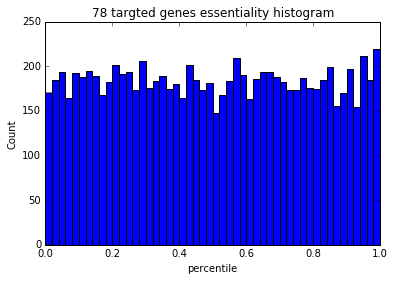

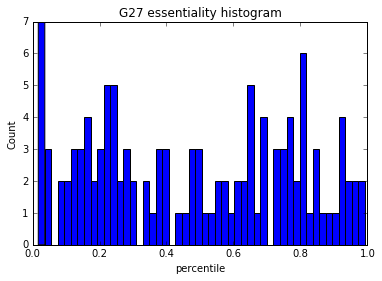

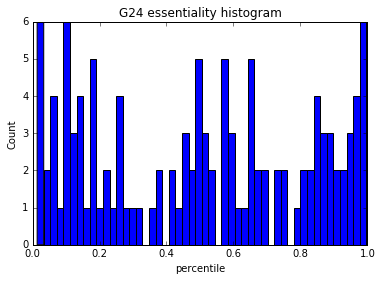

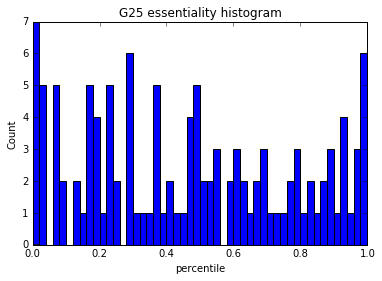

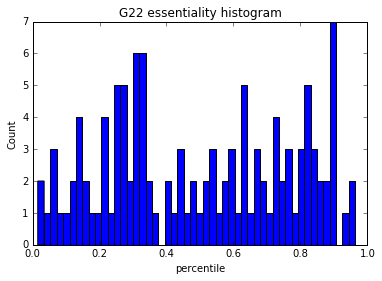

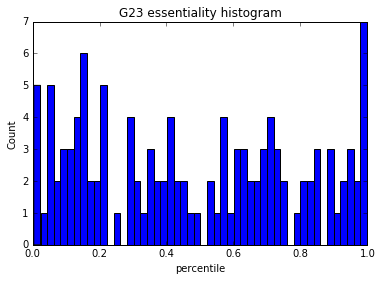

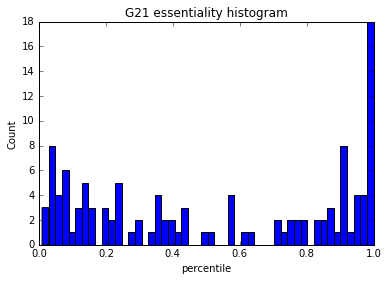

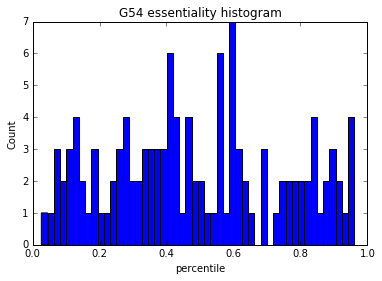

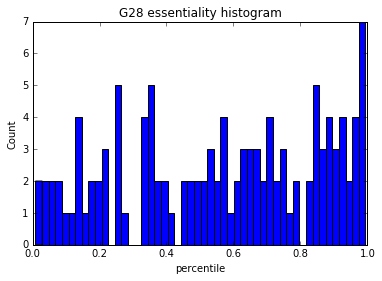

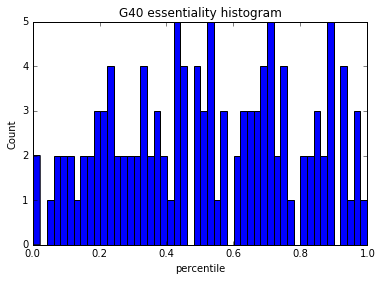

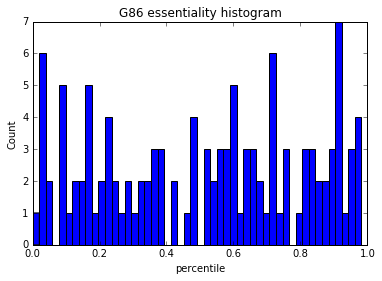

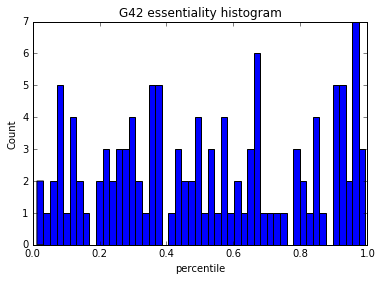

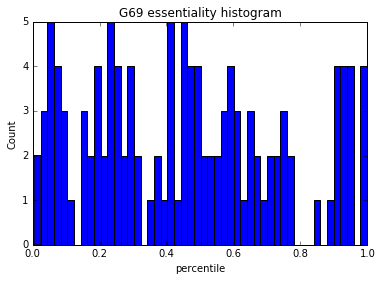

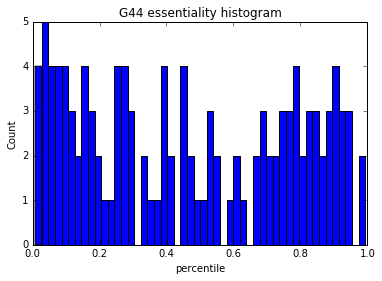

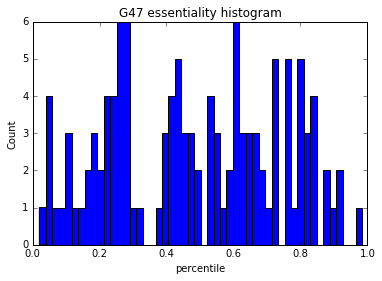

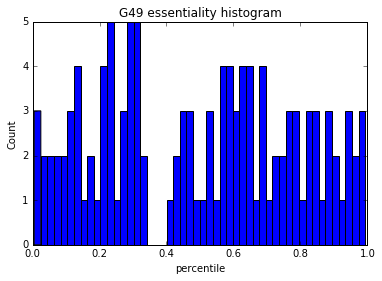

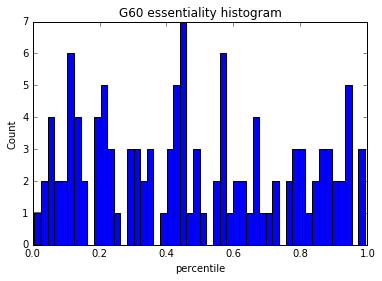

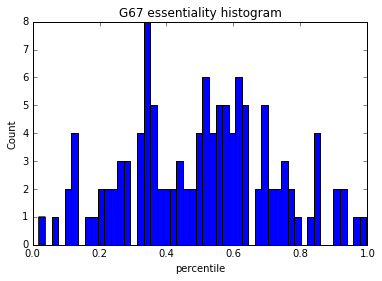

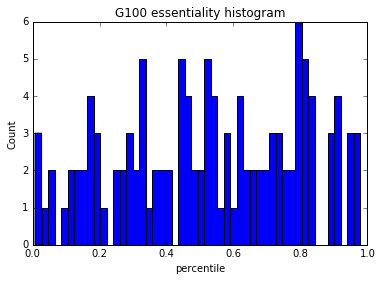

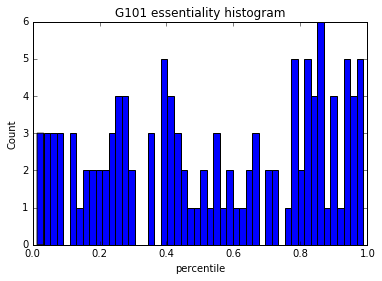

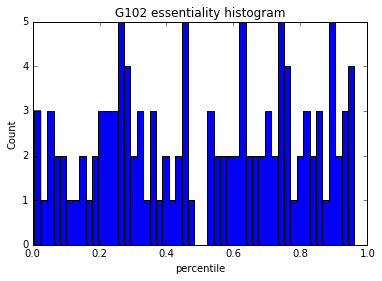

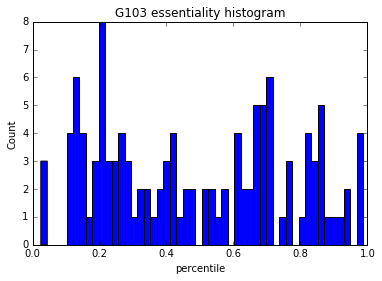

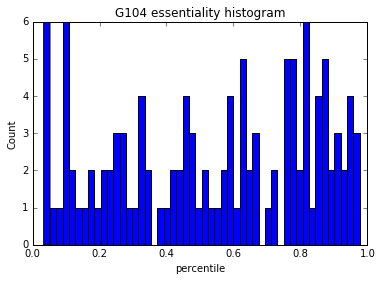

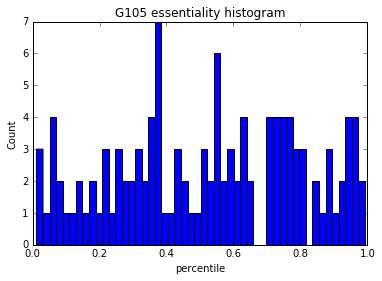

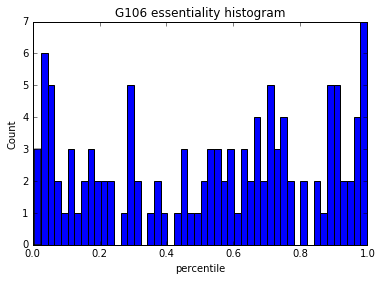

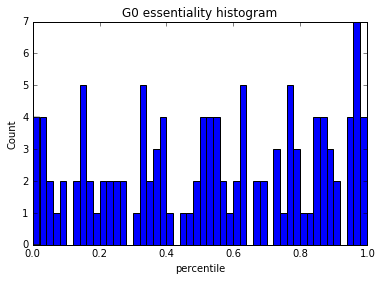

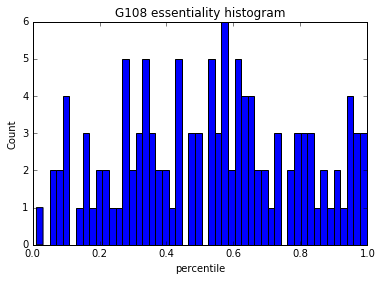

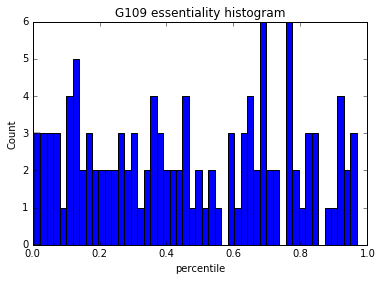

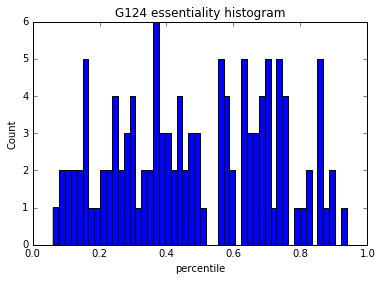

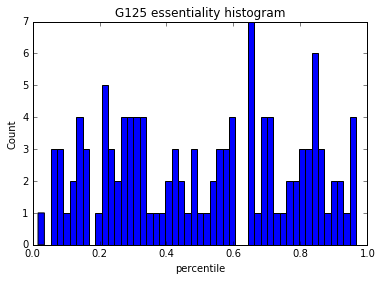

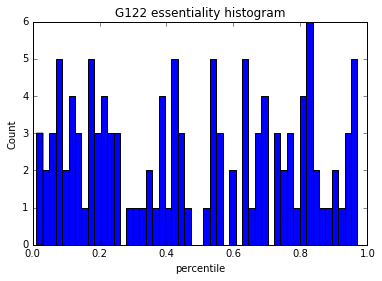

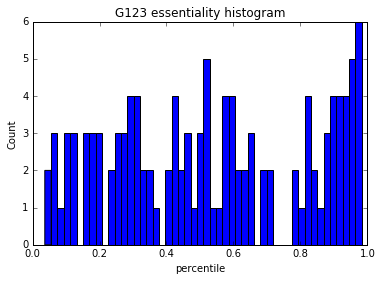

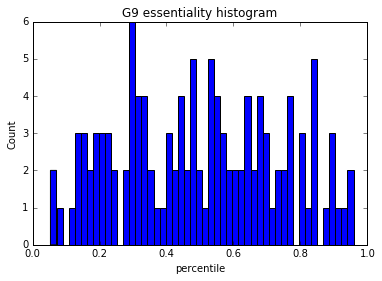

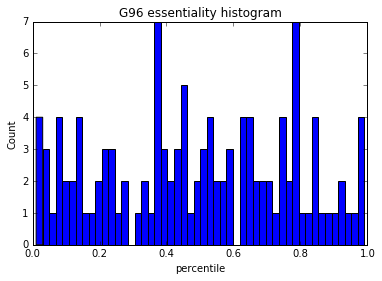

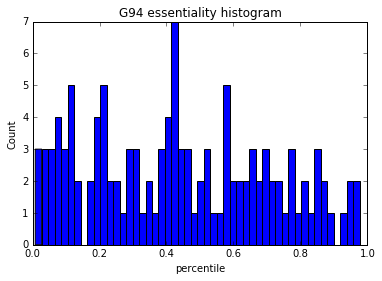

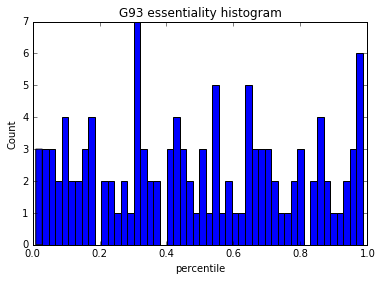

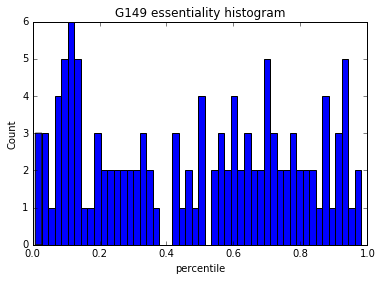

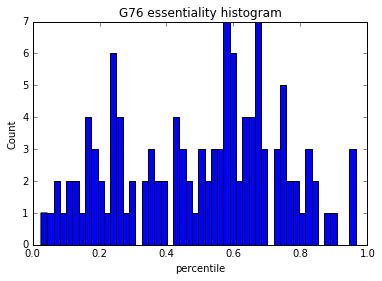

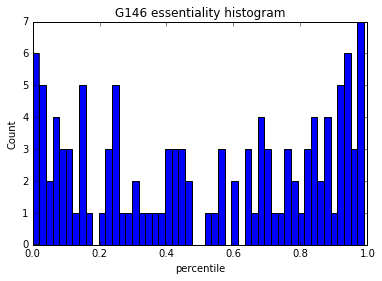

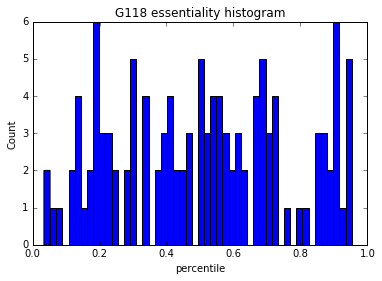

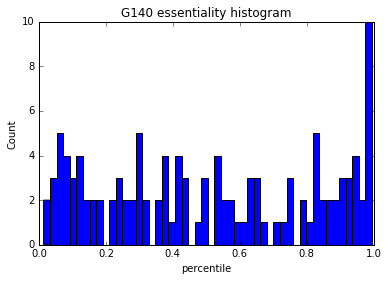

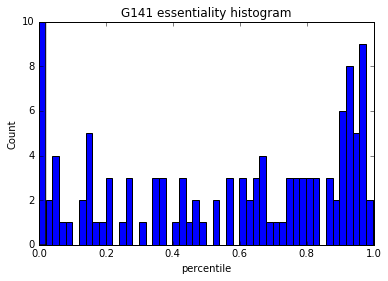

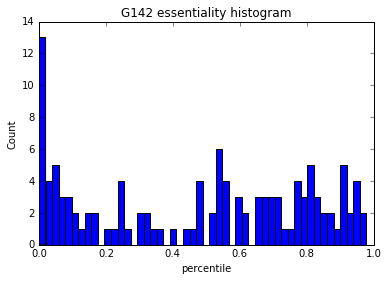

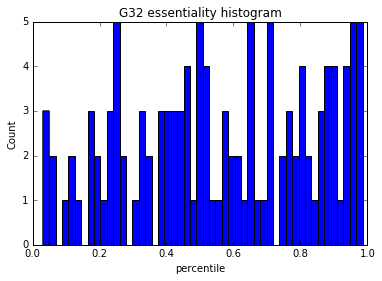

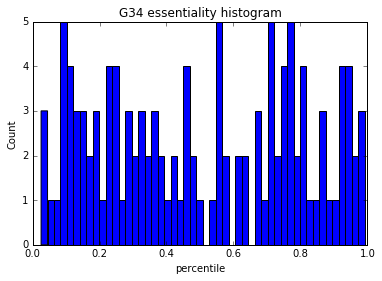

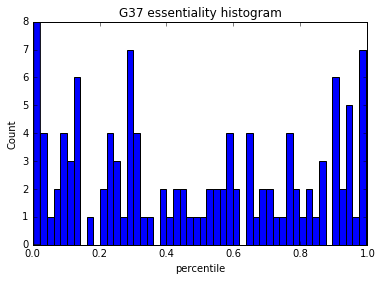

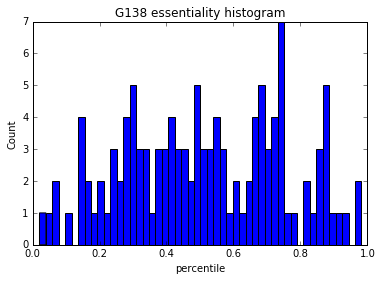

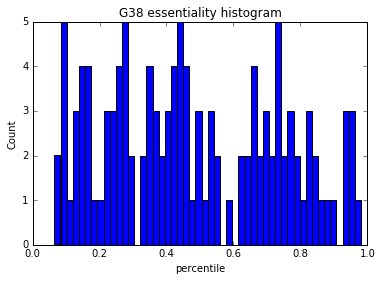

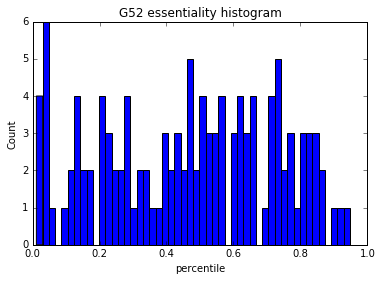

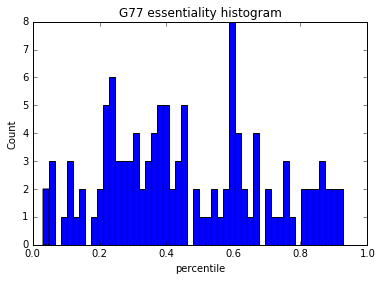

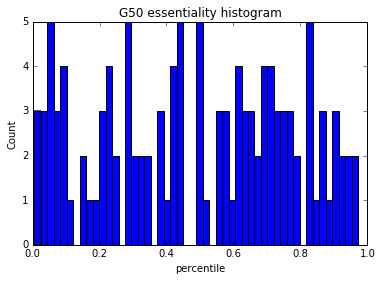

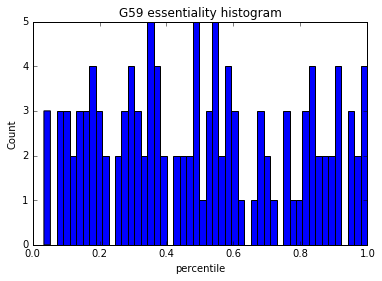

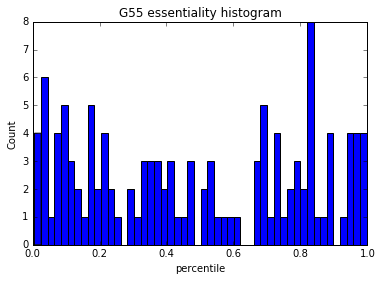

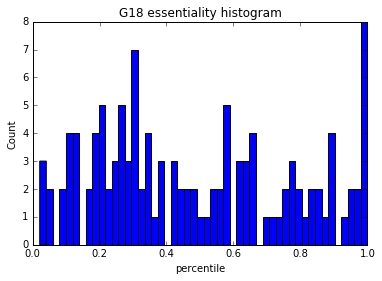

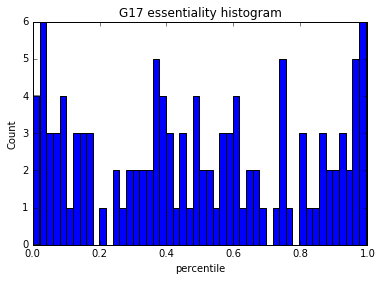

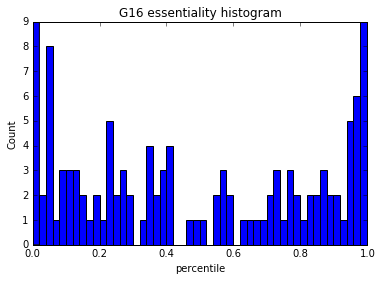

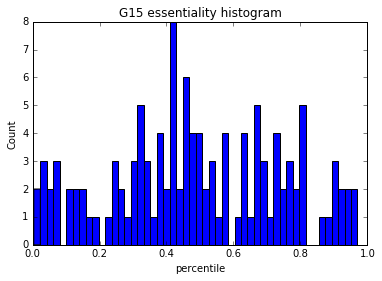

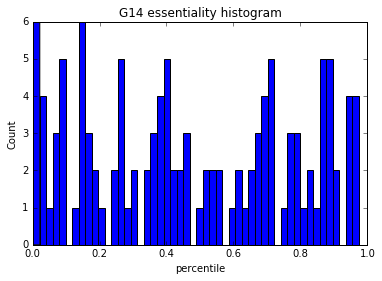

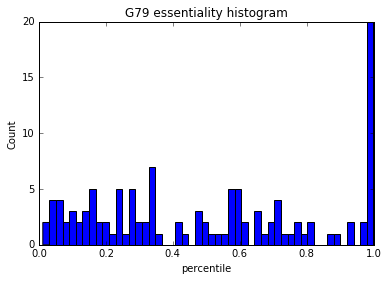

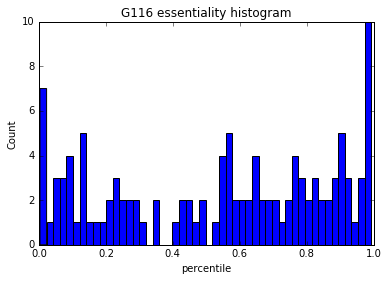

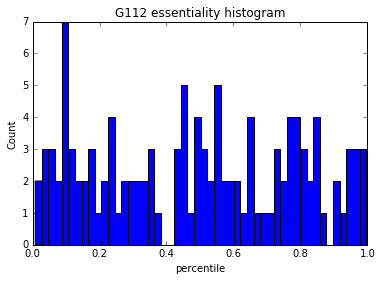

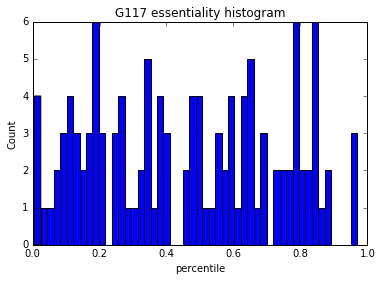

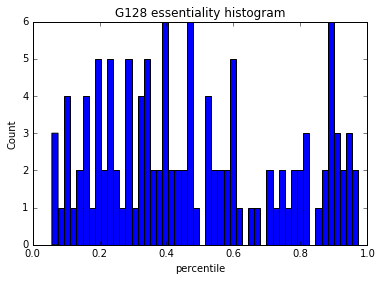

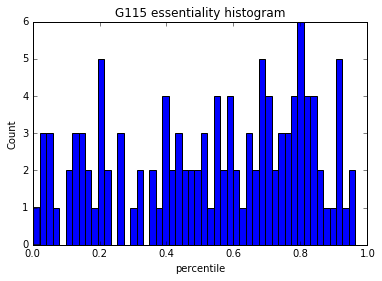

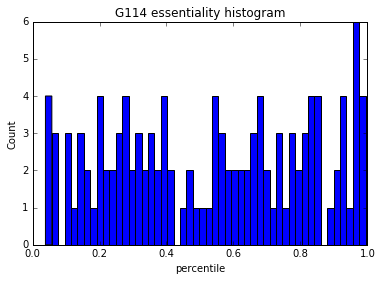

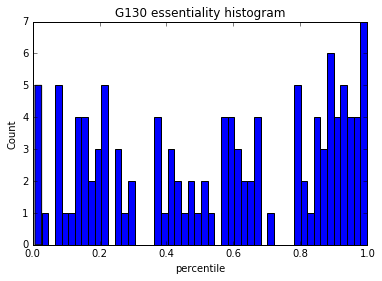

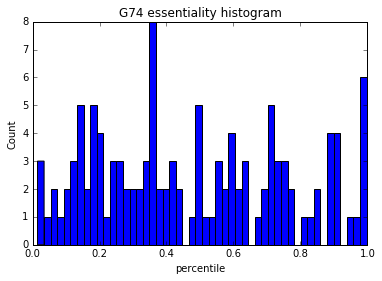

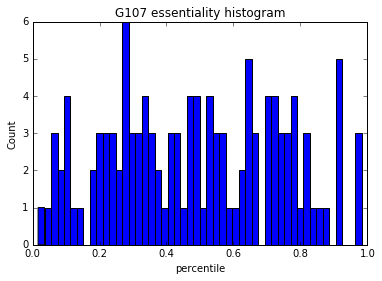

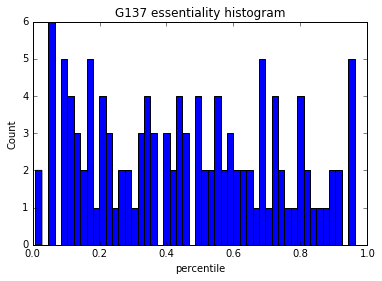

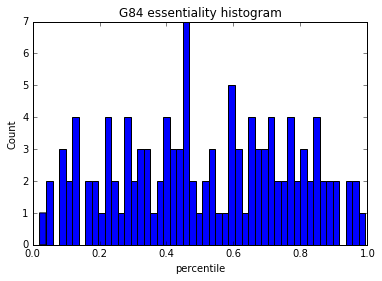

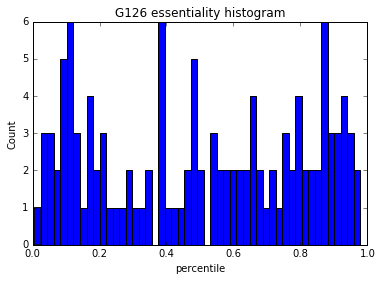

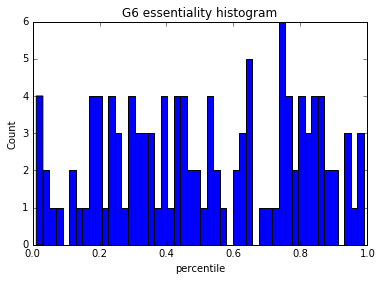

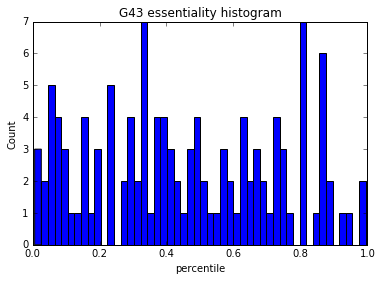

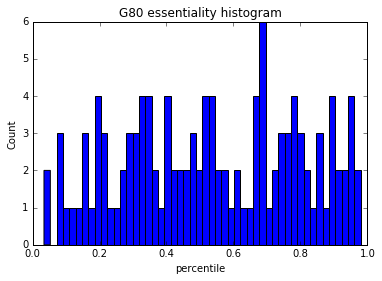

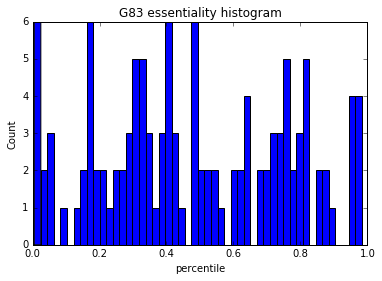

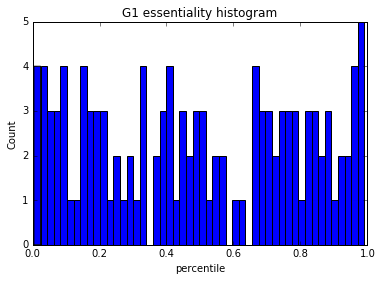

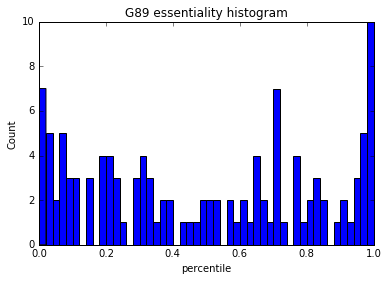

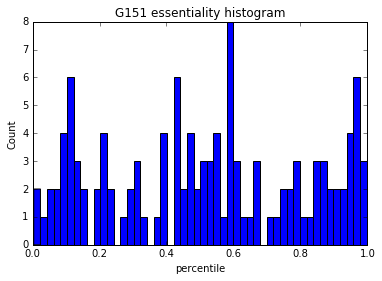

In [53]:
### essentiality histogram of each gene targted by drugs

df = pd.read_csv("../data/data_table_percent_essential_overlap.tsv", delimiter="\t", index_col="cell")
drug_target_cols= filter(None, [i if "target" in i else "" for i in df.columns])
genes = [i.split("_")[0] for i in drug_target_cols]
df.drop(["drug", "cell-drug-pair", "sensitivity"] + drug_target_cols, axis=1, inplace=True)

df.drop_duplicates(inplace=True)
ax = plt.hist(df.values.flatten(), bins=50)
plt.title("78 targted genes essentiality histogram")
plt.xlabel("percentile")
plt.ylabel("Count")

for gene in genes:
    plt.figure(gene)
    ax = plt.hist(df[gene + "_essential"].values, bins=50)
    plt.title(gene + " essentiality histogram")
    plt.xlabel("percentile")
    plt.ylabel("Count")